<a href="https://colab.research.google.com/github/raulbenitez/introAI_ICE/blob/main/AnalisiDiscriminantsCotxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXERCICI**: Aplicar GNB, LDA y QDA amb les dades de cotxes

Etiqueta clase: 'origin'. Usar les set variables numèriques.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = sns.load_dataset('mpg') # Load data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
#Treure totes les files que tenen algun NaN (creo df_netes):
df_netes = df.copy()
df_netes.dropna(inplace=True)
df_netes.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


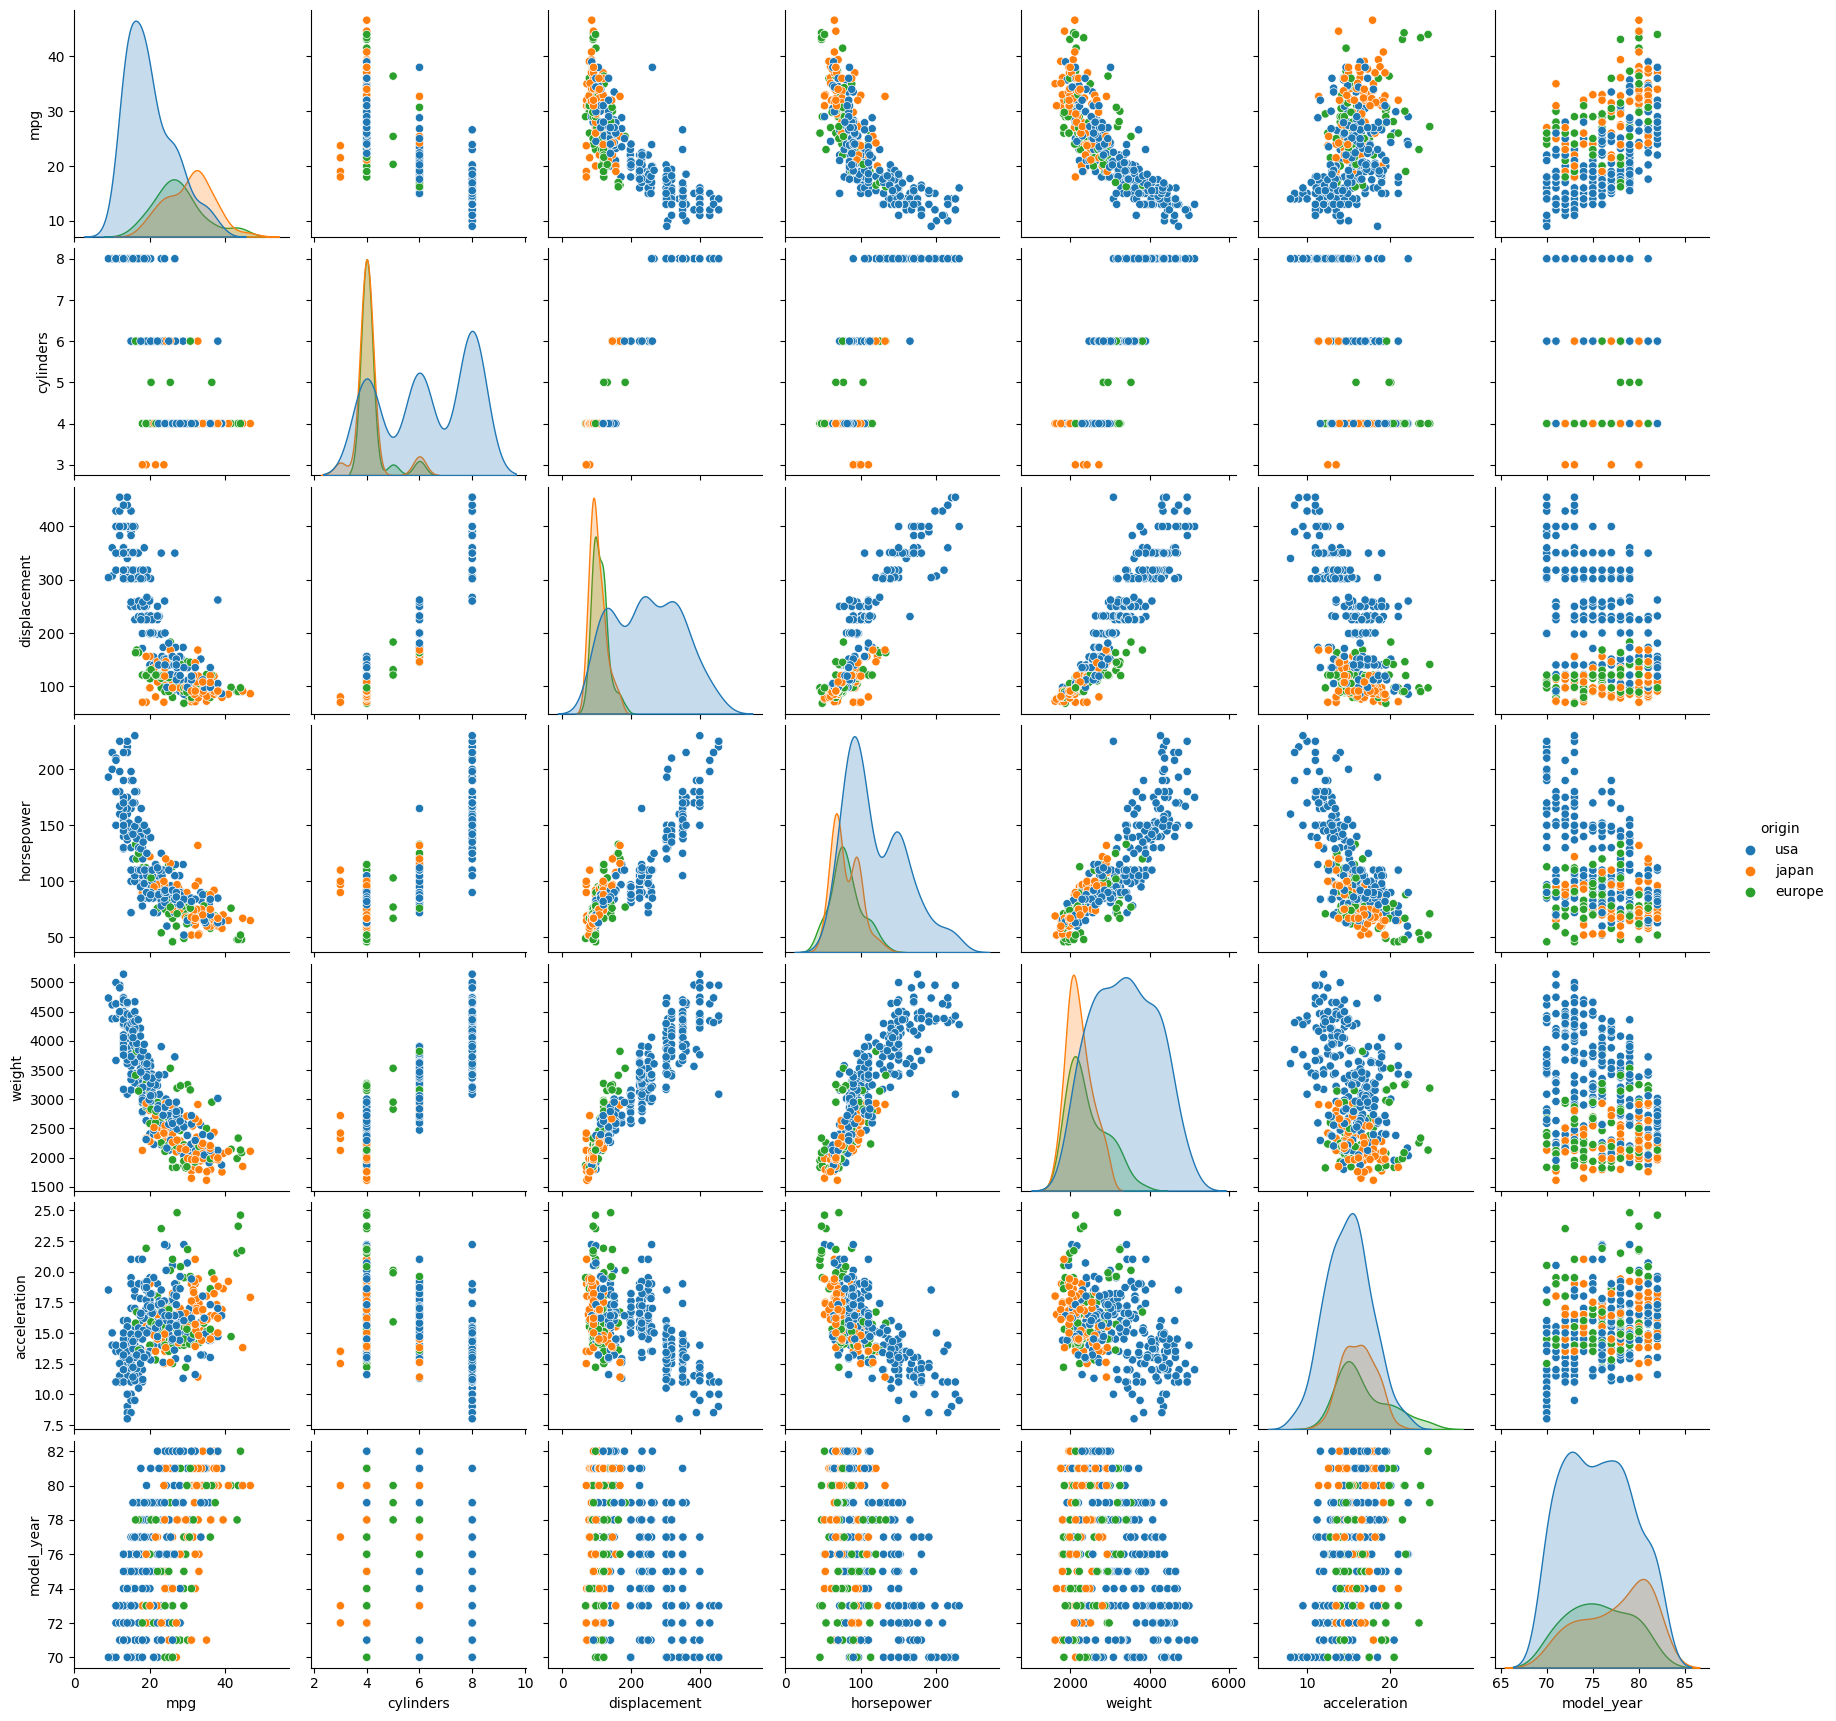

In [ ]:
sns.pairplot(df_netes, hue='origin')

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = df_netes[['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year']] # features
y = df_netes['origin'] # class label

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,train_size=0.8) # Aquí sí que ho separo entre train i test


In [ ]:
gnb = GaussianNB()
gnb_model = gnb.fit(Xtrain, ytrain)
y_pred_gnb_test = gnb_model.predict(Xtest)
cm_gnb = confusion_matrix(ytest, y_pred_gnb_test)
print('Gaussian Naive Bayes = \n {}'.format(cm_gnb))

Gaussian Naive Bayes = 
 [[ 5  4  0]
 [ 6 18  1]
 [ 6 11 28]]


In [ ]:
clf_lda = LinearDiscriminantAnalysis(priors=None,store_covariance=True)
lda_model = clf_lda.fit(Xtrain,ytrain)
y_pred_lda_test = lda_model.predict(Xtest)
cm_lda = confusion_matrix(ytest, y_pred_lda_test)
print('Linear Discriminant Analysis = \n {}'.format(cm_lda))

Linear Discriminant Analysis = 
 [[ 5  2  2]
 [10 13  2]
 [ 6  6 33]]


In [ ]:
clf_qda = QuadraticDiscriminantAnalysis(priors=None,store_covariance=True)
qda_model = clf_qda.fit(Xtrain,ytrain)
y_pred_qda_test = qda_model.predict(Xtest)
cm_qda = confusion_matrix(ytest, y_pred_qda_test)
print('Quadratic Discriminant Analysis = \n {}'.format(cm_qda))

Quadratic Discriminant Analysis = 
 [[ 4  5  0]
 [ 7 15  3]
 [ 2 10 33]]
